# **2b Training GAN on FashionMNIST dataset**

In [17]:
#loading libraries
import numpy as np 
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
import pandas as pd
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# **loading the fashion_mnist dataset**

In [19]:
from keras.datasets.fashion_mnist import load_data

# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

In [20]:
print('Shape of Train dataset', trainX.shape, trainy.shape)
print('Shape of Test dataset', testX.shape, testy.shape)

Shape of Train dataset (60000, 28, 28) (60000,)
Shape of Test dataset (10000, 28, 28) (10000,)


**plot Some images from the training dataset**

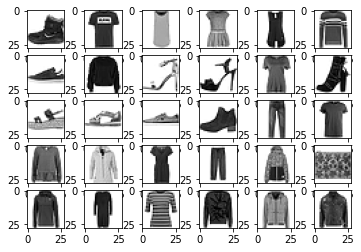

In [21]:
for i in range(30):
	# define subplot
	pyplot.subplot(5, 6, 1 + i) #number of rows is 5 and number of columns is 6
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [22]:
(trainX, _), (_, _) = load_data()
# expanding to 3 dimension
data = expand_dims(trainX, axis=-1)
# converting from ints to floats
data = data.astype('float32')
# scaling from [0,255] to [-1,1]
data = (data - 127.5) / 127.5

In [23]:
dataset = data
val = dataset.shape[0]

# **function to select real samples**

In [24]:
def gen_real(dataset, count):
	# choosing random instances
	index = randint(0, val , count)
	# selecting images
	Image = dataset[index]
	# generating class labels
	Label = ones((count, 1))
	return Image,Label

# **Function to generate fake samples with class labels**

In [25]:
def gen_fake(generator, latent_dim, count):
	# generate points in latent space
	x_point = generate_latent_points(latent_dim, count)
	# predicting the output
	img = generator.predict(x_point)
	# creating class labels
	label = zeros((count, 1))
	return img , label

# **Function for plotting generated images**

In [26]:
def gen_plot(x, num):
  y = num * num
  for i in range(y):
    pyplot.subplot(num, num, 1 + i)
    pyplot.imshow(x[i, :, :, 0], cmap='gray_r')
  pyplot.show()

# **Function to generate points in latent space as input for generator model**

In [27]:
def generate_latent_points(latent_dim, count):
	# generate points in the latent space
	x_point = randn(latent_dim * count)
	# reshape into a batch of inputs for the network
	x_point = x_point.reshape(count, latent_dim)
	return x_point

In [28]:
#size of the latent space
latent_dim = 100

# **Discriminator model**

In [30]:
discriminator = Sequential()
discriminator.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape= (28,28,1)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.4))
discriminator.add(Dense(1, activation='sigmoid'))

# compile model
opt = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# **Generator**

In [31]:
generator = Sequential()
generator.add(Dense((128*7*7), input_dim=latent_dim))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Reshape((7, 7, 128)))
generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))

# generate
generator.add(Conv2D(1, (7,7), activation='tanh', padding='same'))

# **Combining generator and discriminator**

In [51]:
# make weights in the discriminator not trainable
discriminator.trainable = False

model = Sequential()
model.add(generator)
model.add(discriminator)

# compile model
opt = Adam(learning_rate = 0.0002, beta_1=0.5)
model.compile(loss='binary_crossentropy', optimizer=opt)

In [52]:
epoch = 50
batch_size = 128
batch_per_epoch = int(dataset.shape[0] / batch_size)
half_batch = int( batch_size / 2)

epoch = 1 batch number =  1 / 468 discriminator loss 1 = 0.6435871124267578 discriminator loss 2 = 0.6544803380966187 generator loss = 0.7668555378913879 

epoch = 1 batch number =  2 / 468 discriminator loss 1 = 0.6345378160476685 discriminator loss 2 = 0.700687050819397 generator loss = 0.7845728397369385 

epoch = 1 batch number =  3 / 468 discriminator loss 1 = 0.650804877281189 discriminator loss 2 = 0.7272112369537354 generator loss = 0.7439010143280029 

epoch = 1 batch number =  4 / 468 discriminator loss 1 = 0.6551358699798584 discriminator loss 2 = 0.7891416549682617 generator loss = 0.7569850087165833 

epoch = 1 batch number =  5 / 468 discriminator loss 1 = 0.7046817541122437 discriminator loss 2 = 0.6572569012641907 generator loss = 0.7650180459022522 

epoch = 1 batch number =  6 / 468 discriminator loss 1 = 0.7106730937957764 discriminator loss 2 = 0.7285548448562622 generator loss = 0.7536806464195251 

epoch = 1 batch number =  7 / 468 discriminator loss 1 = 0.6939479

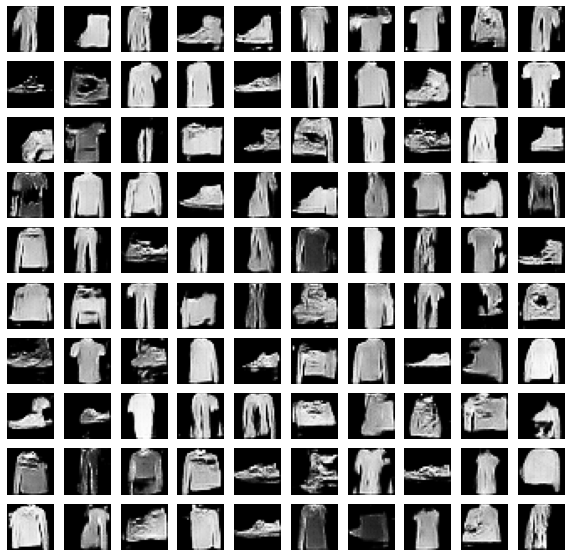

epoch = 6 batch number =  1 / 468 discriminator loss 1 = 0.6925380229949951 discriminator loss 2 = 0.6921008229255676 generator loss = 0.7173836827278137 

epoch = 6 batch number =  2 / 468 discriminator loss 1 = 0.7175461053848267 discriminator loss 2 = 0.7029492259025574 generator loss = 0.7178195714950562 

epoch = 6 batch number =  3 / 468 discriminator loss 1 = 0.6886613965034485 discriminator loss 2 = 0.691693902015686 generator loss = 0.7147344350814819 

epoch = 6 batch number =  4 / 468 discriminator loss 1 = 0.7057052850723267 discriminator loss 2 = 0.7062617540359497 generator loss = 0.705498993396759 

epoch = 6 batch number =  5 / 468 discriminator loss 1 = 0.6877779960632324 discriminator loss 2 = 0.7067517042160034 generator loss = 0.6986367702484131 

epoch = 6 batch number =  6 / 468 discriminator loss 1 = 0.6864373087882996 discriminator loss 2 = 0.688232958316803 generator loss = 0.7230000495910645 

epoch = 6 batch number =  7 / 468 discriminator loss 1 = 0.69575262

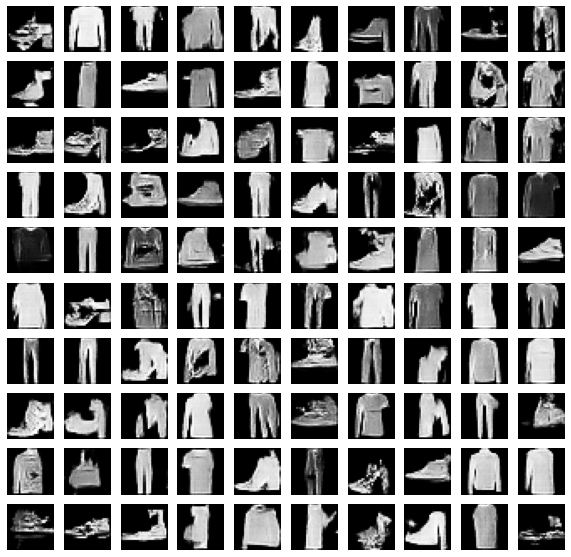

epoch = 11 batch number =  1 / 468 discriminator loss 1 = 0.6922464966773987 discriminator loss 2 = 0.6861629486083984 generator loss = 0.7133952975273132 

epoch = 11 batch number =  2 / 468 discriminator loss 1 = 0.6859370470046997 discriminator loss 2 = 0.7043335437774658 generator loss = 0.6925915479660034 

epoch = 11 batch number =  3 / 468 discriminator loss 1 = 0.7055656909942627 discriminator loss 2 = 0.6866228580474854 generator loss = 0.6913738250732422 

epoch = 11 batch number =  4 / 468 discriminator loss 1 = 0.669872522354126 discriminator loss 2 = 0.6886289119720459 generator loss = 0.7086062431335449 

epoch = 11 batch number =  5 / 468 discriminator loss 1 = 0.7100976705551147 discriminator loss 2 = 0.6752733588218689 generator loss = 0.713140606880188 

epoch = 11 batch number =  6 / 468 discriminator loss 1 = 0.7042884826660156 discriminator loss 2 = 0.683282732963562 generator loss = 0.7095358371734619 

epoch = 11 batch number =  7 / 468 discriminator loss 1 = 0.6

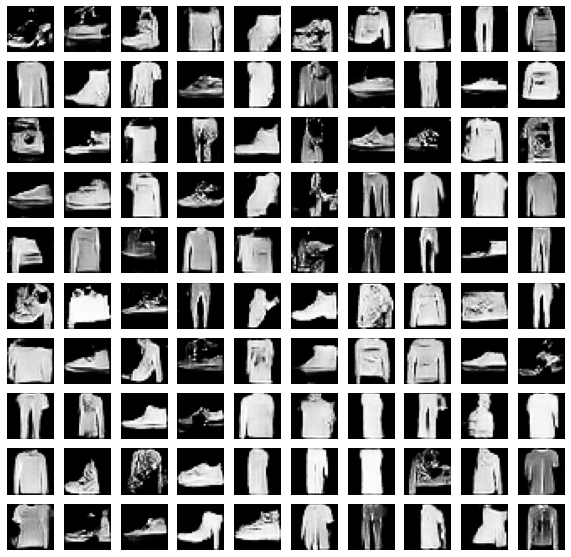

epoch = 16 batch number =  1 / 468 discriminator loss 1 = 0.6855168342590332 discriminator loss 2 = 0.7011027336120605 generator loss = 0.7241935729980469 

epoch = 16 batch number =  2 / 468 discriminator loss 1 = 0.6876559257507324 discriminator loss 2 = 0.6920974254608154 generator loss = 0.7094761729240417 

epoch = 16 batch number =  3 / 468 discriminator loss 1 = 0.6903462409973145 discriminator loss 2 = 0.6733397841453552 generator loss = 0.7213164567947388 

epoch = 16 batch number =  4 / 468 discriminator loss 1 = 0.7087771892547607 discriminator loss 2 = 0.6752891540527344 generator loss = 0.737068772315979 

epoch = 16 batch number =  5 / 468 discriminator loss 1 = 0.6934736967086792 discriminator loss 2 = 0.7006900310516357 generator loss = 0.7382020950317383 

epoch = 16 batch number =  6 / 468 discriminator loss 1 = 0.6959607601165771 discriminator loss 2 = 0.6897515058517456 generator loss = 0.7220005989074707 

epoch = 16 batch number =  7 / 468 discriminator loss 1 = 0

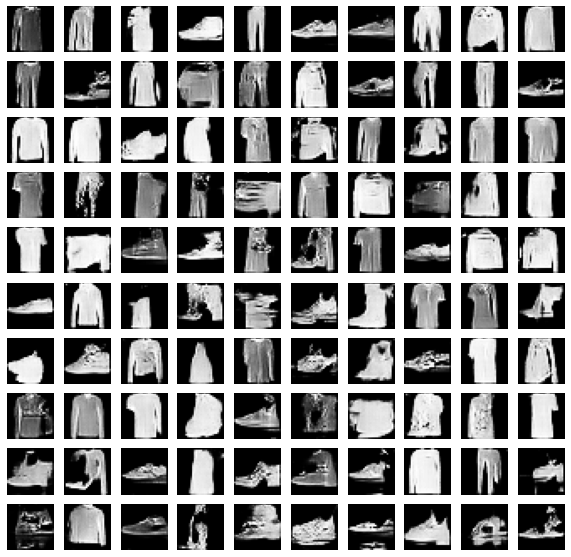

epoch = 21 batch number =  1 / 468 discriminator loss 1 = 0.6951924562454224 discriminator loss 2 = 0.6920406818389893 generator loss = 0.7123464345932007 

epoch = 21 batch number =  2 / 468 discriminator loss 1 = 0.6831446886062622 discriminator loss 2 = 0.6908792853355408 generator loss = 0.7108289003372192 

epoch = 21 batch number =  3 / 468 discriminator loss 1 = 0.6925314664840698 discriminator loss 2 = 0.6956743001937866 generator loss = 0.7128730416297913 

epoch = 21 batch number =  4 / 468 discriminator loss 1 = 0.7027864456176758 discriminator loss 2 = 0.6931357383728027 generator loss = 0.7156721353530884 

epoch = 21 batch number =  5 / 468 discriminator loss 1 = 0.7049973011016846 discriminator loss 2 = 0.6901313066482544 generator loss = 0.7158514857292175 

epoch = 21 batch number =  6 / 468 discriminator loss 1 = 0.6948804259300232 discriminator loss 2 = 0.6939982175827026 generator loss = 0.7197984457015991 

epoch = 21 batch number =  7 / 468 discriminator loss 1 = 

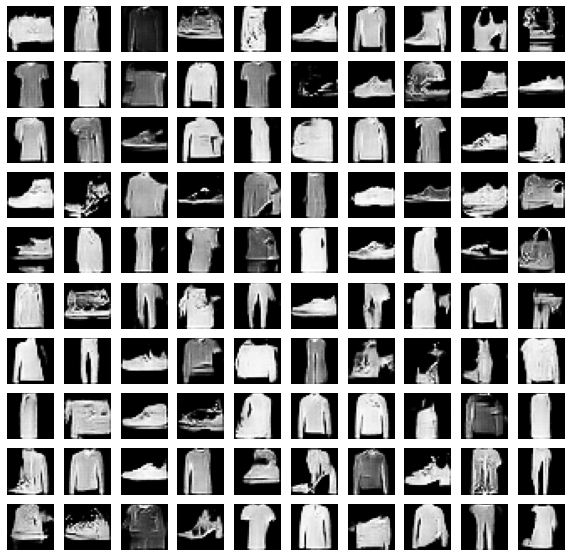

epoch = 26 batch number =  1 / 468 discriminator loss 1 = 0.6934143304824829 discriminator loss 2 = 0.677009105682373 generator loss = 0.7294764518737793 

epoch = 26 batch number =  2 / 468 discriminator loss 1 = 0.6898728609085083 discriminator loss 2 = 0.6830533742904663 generator loss = 0.7139540314674377 

epoch = 26 batch number =  3 / 468 discriminator loss 1 = 0.691531777381897 discriminator loss 2 = 0.6899082660675049 generator loss = 0.7190800905227661 

epoch = 26 batch number =  4 / 468 discriminator loss 1 = 0.6983181238174438 discriminator loss 2 = 0.6846349239349365 generator loss = 0.7082833051681519 

epoch = 26 batch number =  5 / 468 discriminator loss 1 = 0.704897403717041 discriminator loss 2 = 0.6919727921485901 generator loss = 0.7186535596847534 

epoch = 26 batch number =  6 / 468 discriminator loss 1 = 0.6912921667098999 discriminator loss 2 = 0.6812595129013062 generator loss = 0.7099019289016724 

epoch = 26 batch number =  7 / 468 discriminator loss 1 = 0.6

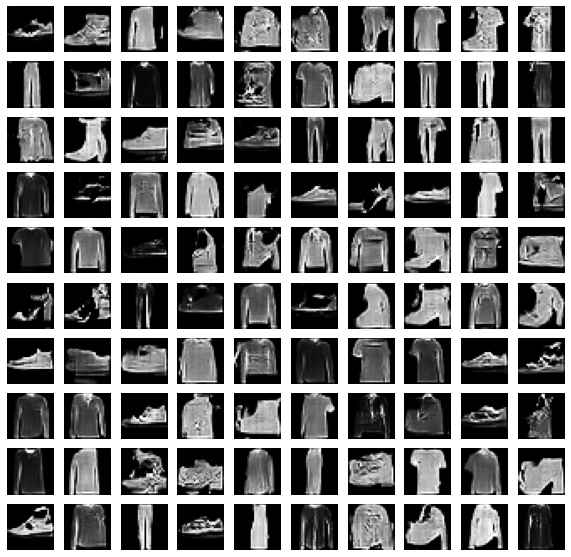

epoch = 31 batch number =  1 / 468 discriminator loss 1 = 0.6944505572319031 discriminator loss 2 = 0.6786080598831177 generator loss = 0.7290557026863098 

epoch = 31 batch number =  2 / 468 discriminator loss 1 = 0.6853235363960266 discriminator loss 2 = 0.6576942205429077 generator loss = 0.7222369909286499 

epoch = 31 batch number =  3 / 468 discriminator loss 1 = 0.6979503631591797 discriminator loss 2 = 0.7006206512451172 generator loss = 0.722556471824646 

epoch = 31 batch number =  4 / 468 discriminator loss 1 = 0.6839470267295837 discriminator loss 2 = 0.6962777376174927 generator loss = 0.7020028829574585 

epoch = 31 batch number =  5 / 468 discriminator loss 1 = 0.6901955604553223 discriminator loss 2 = 0.7166616916656494 generator loss = 0.6940152645111084 

epoch = 31 batch number =  6 / 468 discriminator loss 1 = 0.6868981122970581 discriminator loss 2 = 0.700608491897583 generator loss = 0.7082284688949585 

epoch = 31 batch number =  7 / 468 discriminator loss 1 = 0.

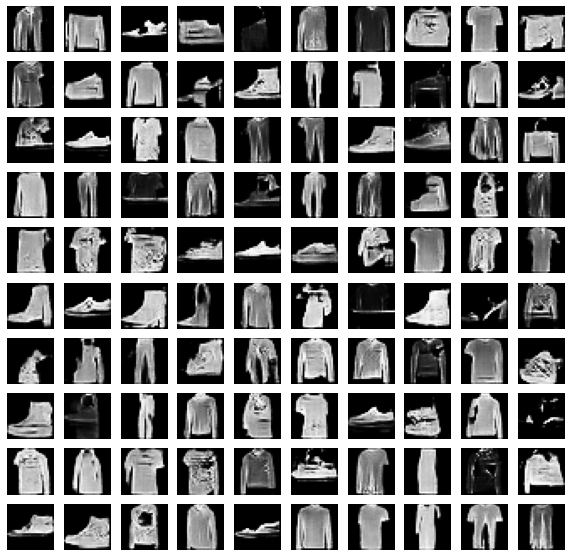

epoch = 36 batch number =  1 / 468 discriminator loss 1 = 0.6956273317337036 discriminator loss 2 = 0.6944993734359741 generator loss = 0.7096436023712158 

epoch = 36 batch number =  2 / 468 discriminator loss 1 = 0.6954860687255859 discriminator loss 2 = 0.6891523599624634 generator loss = 0.7209628224372864 

epoch = 36 batch number =  3 / 468 discriminator loss 1 = 0.6810430288314819 discriminator loss 2 = 0.700577437877655 generator loss = 0.709589958190918 

epoch = 36 batch number =  4 / 468 discriminator loss 1 = 0.6818699836730957 discriminator loss 2 = 0.6995782852172852 generator loss = 0.6974225640296936 

epoch = 36 batch number =  5 / 468 discriminator loss 1 = 0.6928626298904419 discriminator loss 2 = 0.71030592918396 generator loss = 0.7001050710678101 

epoch = 36 batch number =  6 / 468 discriminator loss 1 = 0.696524441242218 discriminator loss 2 = 0.6980888247489929 generator loss = 0.7051550149917603 

epoch = 36 batch number =  7 / 468 discriminator loss 1 = 0.697

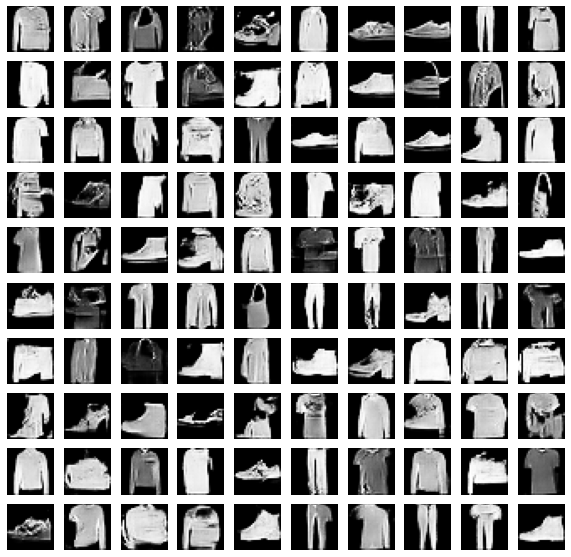

epoch = 41 batch number =  1 / 468 discriminator loss 1 = 0.6912897825241089 discriminator loss 2 = 0.693784236907959 generator loss = 0.7107831835746765 

epoch = 41 batch number =  2 / 468 discriminator loss 1 = 0.7067006826400757 discriminator loss 2 = 0.6853340864181519 generator loss = 0.7081717252731323 

epoch = 41 batch number =  3 / 468 discriminator loss 1 = 0.7017905712127686 discriminator loss 2 = 0.6822563409805298 generator loss = 0.7057976722717285 

epoch = 41 batch number =  4 / 468 discriminator loss 1 = 0.6978294253349304 discriminator loss 2 = 0.687479555606842 generator loss = 0.7095264196395874 

epoch = 41 batch number =  5 / 468 discriminator loss 1 = 0.6957094669342041 discriminator loss 2 = 0.6900492310523987 generator loss = 0.7145363092422485 

epoch = 41 batch number =  6 / 468 discriminator loss 1 = 0.6950320601463318 discriminator loss 2 = 0.6788462400436401 generator loss = 0.7102271318435669 

epoch = 41 batch number =  7 / 468 discriminator loss 1 = 0.

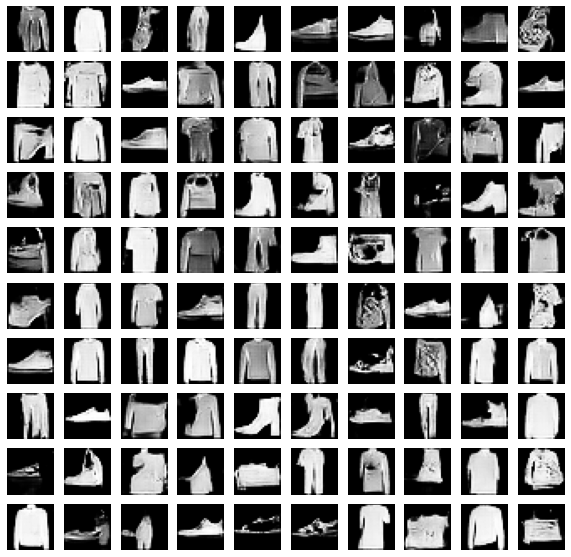

epoch = 46 batch number =  1 / 468 discriminator loss 1 = 0.6916395425796509 discriminator loss 2 = 0.7040104866027832 generator loss = 0.7140576243400574 

epoch = 46 batch number =  2 / 468 discriminator loss 1 = 0.7015273571014404 discriminator loss 2 = 0.6843369007110596 generator loss = 0.7153716087341309 

epoch = 46 batch number =  3 / 468 discriminator loss 1 = 0.6924319267272949 discriminator loss 2 = 0.6869097948074341 generator loss = 0.7118769288063049 

epoch = 46 batch number =  4 / 468 discriminator loss 1 = 0.7092208862304688 discriminator loss 2 = 0.6839820146560669 generator loss = 0.7124099731445312 

epoch = 46 batch number =  5 / 468 discriminator loss 1 = 0.6929428577423096 discriminator loss 2 = 0.6761414408683777 generator loss = 0.7169561386108398 

epoch = 46 batch number =  6 / 468 discriminator loss 1 = 0.702681839466095 discriminator loss 2 = 0.6875027418136597 generator loss = 0.7122988700866699 

epoch = 46 batch number =  7 / 468 discriminator loss 1 = 0

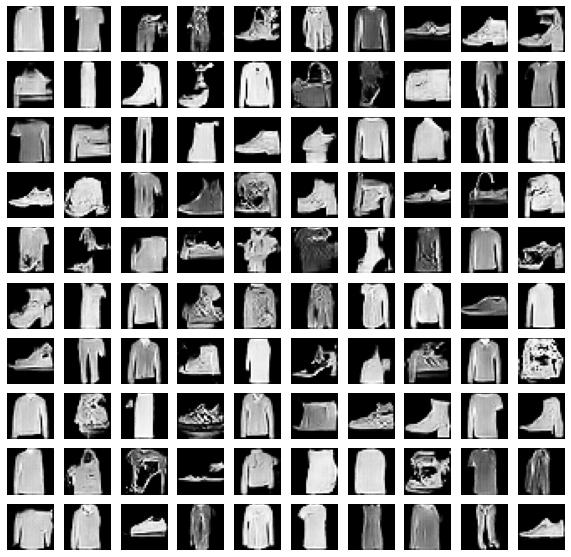

In [53]:
discriminator_loss_list = [] #to store value of discriminator loss for each epoch
generator_loss_list = [] #to store value of generator loss for each epoch
for i in range(1,(epoch+1)):
  for j in range(batch_per_epoch):
    # get randomly selected 'real' samples
    X_orig,y_orig = gen_real(dataset,half_batch)
		
    # update discriminator model weights
    discriminator_loss1, _ = discriminator.train_on_batch(X_orig, y_orig)
		
		# generate 'fake' examples
    X_fake, y_fake = gen_fake(generator, latent_dim, half_batch)
		
		# update discriminator model weights
    discriminator_loss2, _ = discriminator.train_on_batch(X_fake, y_fake)
		
		# prepare points in latent space as input for the generator
    X_gan = generate_latent_points(latent_dim, batch_size)
		
		# create inverted labels for the fake samples
    y_gan = ones((batch_size, 1))
		
		# update the generator via the discriminator's error
    generator_loss = model.train_on_batch(X_gan, y_gan)
		
    print("epoch =",i,"batch number = ",(j+1),"/",batch_per_epoch,"discriminator loss 1 =",discriminator_loss1,"discriminator loss 2 =",discriminator_loss2,"generator loss =",generator_loss,"\n")
    
  #plotting generated images after every 5 epoch
  if i % 5 == 0:
    samples = 100
    x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))
    plt.figure(figsize=(10,10))
    for k in range(samples):
      plt.subplot(10, 10, k+1)
      plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
      plt.axis("off")
    plt.show()

  discriminator_loss_list.append(discriminator_loss2)
  generator_loss_list.append(generator_loss)
# save the generator model
generator.save('generator.h5')

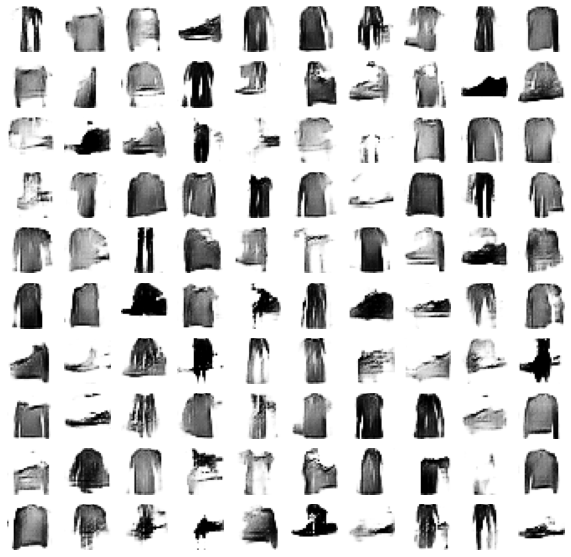

In [48]:
def show_plot(examples, n):
  plt.figure(figsize=(10,10))
  for i in range(n*n):
    pyplot.subplot(n, n, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
  pyplot.show()
		
#plotting 100 fake images by generator
model = load_model('generator.h5')
latent_points = generate_latent_points(100, 100)
img = model.predict(latent_points)
show_plot(img, 10)

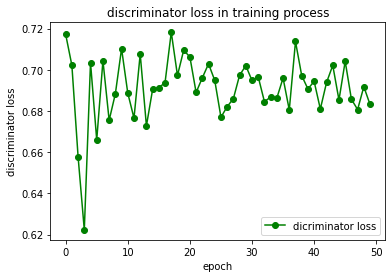

In [ ]:
#plot discriminator loss 
plt.plot(discriminator_loss_list, 'go-', label = "dicriminator loss")

plt.legend()
plt.title('discriminator loss in training process')
# Plot axes labels and show the plot
plt.xlabel('epoch')
plt.ylabel('discriminator loss')
plt.show()

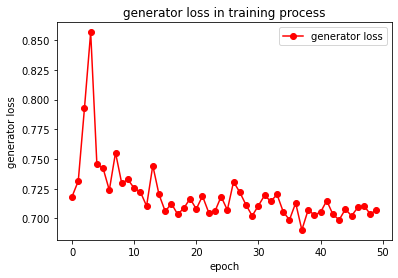

In [ ]:
#plot generator loss 
plt.plot(generator_loss_list, 'ro-', label = "generator loss")

plt.legend()
plt.title('generator loss in training process')
# Plot axes labels and show the plot
plt.xlabel('epoch')
plt.ylabel('generator loss')
plt.show()